# 📚  Exercise Session - Week 5

Welcome to Week 5 exercise's session of CS552-Modern NLP!


> **What will be covered:**

[Part 1: Intro](#distilbert)
- [DistilBERT](#distilbert1)

[Part 2: Sentiment Analysis](#sent0)
- [Model from Scratch](#sent1)
- [Pre-trained, fine-tuned model](#setn2)

[Part 3: Natural Language Inference (NLI)](#nli0)

[Part 4: Sentence Similarity](#ss0)
- [SBERT](#ss1)

[Part 5: Conclusion](#conc)

[(Optional): DistilBERT](#opt)


> **By the end of the session you will be able to:**
> - Use pretrained models on external datasets
> - Gain an understanding on how pretrained models can perform on a variety of tasks


<a name="distilbert"></a>
## 1. Pretrained models

This lab will make use of the [transformers](https://huggingface.co/docs/transformers/index) package from Huggingface, which you used in Assignment 1. Huggingface provides access to a large variety of models.

You are also able to share models you train with the public, or access model others have provided public access to. These can be seen by clicking on the "models" tab on the webiste. There are over 100k models provided by various research groups of individuals using a variety of architectures.



In [ ]:
!pip install torch
!pip install transformers
!pip install datasets
!pip install sentence_transformers


In [ ]:
import pandas as pd
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
from datasets import load_dataset
import torch
from sklearn.metrics import accuracy_score, f1_score
from sentence_transformers import SentenceTransformer, util

<a name="distilbert1"></a>
## 1.1 DistilBERT

For the beginning of this lab we will be using fine-tuned [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert) models. You will learn the detail of implementaion later in the course, and do not need to worry about it for this lab. However if you want to read a bit about it anyways, there is information at the end. This is completely optional to review now.

<a name="sent0"></a>
## 2. Sentiment Analysis

The first fine-tuned model we will explore is one trained for a sequence classification task, specifically sentiment analysis.




We will using the IMDB dataset from the first lab exercise.

<a name="sent1"></a>
## 2.1 Model from Scratch

First we will test the performace of a model with the DistilBERT arctitecture trained on the IMDB reviews from scratch. You will not need to do the training, the model will be povided. We are just evaluating.

We will also be testing performance on the [Stanford Sentiment Treebank](https://huggingface.co/datasets/sst). This datast is also a sentiment dataset with movie reviews, however the movie reviews are taken from another source than IMDB, and are single sentences.

First import the model and dataset.


In [ ]:
mod = f"imdb_distilbert"

tokenizer = AutoTokenizer.from_pretrained(mod)
config = AutoConfig.from_pretrained(mod)
model = AutoModelForSequenceClassification.from_pretrained(mod)


movie_reviews = load_dataset("imdb")
test_dataset = movie_reviews["test"].shuffle(seed=907)
test_dataset

To save time feel free to subset the data (~1000 observations). Additionally look at the distibution of the labels.

In [ ]:
#YOUR CODE HERE
test_data_subset = ...

Before we test accuracy on the fine-tuned model, why don't you test some sentences to see how it classifies them.

Please referece the "How to get started with the model" section on a related models huggingface [page](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english#how-to-get-started-with-the-model) to guide you in writing the code to test your sentences.

In [ ]:
#Test sentence here
test_sent = ...

#YOUR CODE HERE

# tokenize the sentence
tokenized_input = ...
# run the model
output = ...

Next get the predictions on the test data.

In [ ]:
outputs = []
for i in range(len(test_data_subset)):
  #YOUR CODE HERE
  # tokenize the input
  input = ...
  # run the model



Now calculate the accuracy and F1 on the dataset. Look at how the model performs by label.
<span style='color:Red'> Hint: you can use the accuracy_score and f1_score functions from sklearn </span>


In [ ]:
#YOUR CODE HERE
imdb_accuracy = ...
imdb_positive_accuracy = ...
imdb_negative_accuracy = ...
imdb_f1_score = ...

Next we will test model performance on the Stanford Sentiment Treebank. Lets test how this model performs on this OOD dataset.

In [ ]:
movie_reviews_sst = load_dataset("sst")
test_dataset_sst = pd.DataFrame(movie_reviews_sst["test"].shuffle(seed=808))
test_dataset_sst.head()

As you see, the labels are not binary, they are on a scale from 0-1. You will need to pick a cut off to determine classification to positive or negative. They recommend the typical 0.5 cutoff, but technically you can choose.

Again, feel free to subset this data.

In [ ]:
#YOUR CODE HERE

# subset the dataset
test_data_subset_sst = ...
# binarize the labels 
test_data_subset_sst['binary'] = ...
test_data_subset_sst['binary'].hist()

Run the samples through the model to get the predicted outputs.

In [ ]:
outputs = []
for i in range(len(test_data_subset)):
  #YOUR CODE HERE
  # tokenize the input
  inputs = ...
  # run the model

Now test the accuracy

In [ ]:
#YOUR CODE HERE
sst_accuracy = ...
sst_positive_accuracy = ...
sst_negative_accuracy = ...
sst_f1_score = ...

Keep this accuracy in mind for the next section. As you may have noticed, the performance is much better on negative samples than positive ones. Why do you think that is the case?

<a name="sent2"></a>
## 2.2 Fine-tuned model

Now lets try a pre-trained DistilBERT that was fine-tuned with the IMDB dataset.

Lets load the model from huggingface.

In [ ]:
#load the model
mod = f"imdb_distil_fine"

tokenizer = AutoTokenizer.from_pretrained(mod)
config = AutoConfig.from_pretrained(mod)
model = AutoModelForSequenceClassification.from_pretrained(mod)


movie_reviews = load_dataset("imdb")
test_dataset = movie_reviews["test"].shuffle(seed=907)


Now evaluate it on the IMBD dataset. To save time, feel free to use it on only a subset.

In [ ]:
test_data_subset = ...
outputs = []
for i in range(len(test_data_subset)):
   #YOUR CODE HERE
   #tokenize the sentence
   # run the model

Now calculate the accuracy on the dataset. Look at how the model performs by label.


In [ ]:
#YOUR CODE HERE

How does the accuracy with the pre-trained model compare to that of the model that was trained from scratch?


Now lets try it on the SST dataset.

In [ ]:
movie_reviews_sst = load_dataset("sst")
test_dataset_sst = pd.DataFrame(movie_reviews_sst["test"].shuffle(seed=808))
test_dataset_sst.head()

Just repeat the steps you did above with the from scratch model to get the accuracy/F1 on the SST dataset with this model.

In [ ]:
#YOUR CODE HERE

How did the fine-tuned model do on the the out of distribution dataset? Why do you think the performance was different?

<a name="nli0"></a>
## 3. Natural language Inference

Now we will look at a DistilBERT model which has been fine-tuned on NLI data. Specifically it has been fine-tuned on on the MNLI task of the [GLUE benchmark](https://gluebenchmark.com/).


In this dataset, the model is given a pair of sentences. The pair has either the label "entail", meaning the first sentence implies the second, "contradict", meaning the second sentence must be false given the first, or 'neutral", meaning you can not judge the second sentence to be true or false given the first sentence.

In [ ]:
mod = f"nli_distilbert"

tokenizer = AutoTokenizer.from_pretrained(mod)
config = AutoConfig.from_pretrained(mod)
model = AutoModelForSequenceClassification.from_pretrained(mod)


mnli = load_dataset("glue",'mnli')
mnli_test = mnli["validation_mismatched"].shuffle(seed=907)


Like before, send the data through the model. Keep in mind, you need to send in the premise and hypothesis jointly.

In [ ]:
# YOUR CODE HERE
mnli_test_subset = ...
mnli_premise = ...
mnli_hypothesis = ...

outputs = []
for i in range(len(mnli_test_subset)):
  # tokenize the input
  inputs = ...
  # run the model
  

Calculate how well the model did on the data <span style='color:Red'> by computing accuracy and f1-score </span>. Check the accuracy by label.

In [ ]:
# YOUR CODE HERE
nli_accuracy = ...
nli_positive_accuracy = ...
nli_negavtive_accuracy = ...
nli_f1_score = ...


<a name="ss0"></a>
## 4. Sentence Similarity

Next we will be using pre-trained models to perform a task that fits under the umbrella of sentence similarity. Specifically, we will be looking at Detecting Duplicate Questions, in which the model needs to determine, given two questions, whether or not they are duplicates.

<a name="ss0"></a>
## 4.1 SBERT

Unlike the previous tasks, which used token level embeddings, in order to perform this task we will use sentence level embeddings. Specifically we will be using SBERT, which was originally proposed in [this paper](https://arxiv.org/abs/1908.10084).

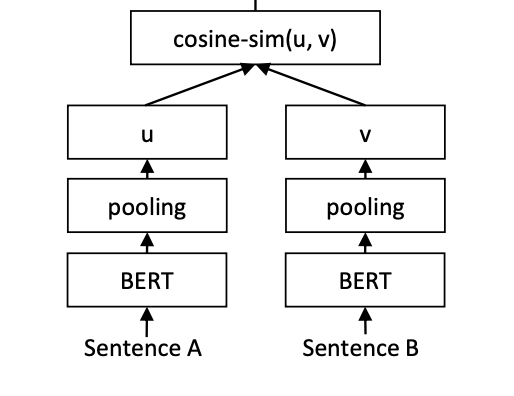

There are two important features of this model. First, on top of a transformer layer, there is a pooling layer, which pools the token level embeddings into a single sentence level embedding. Second, the network uses a siamese arctitecture. This means that the two sentences are embedded seperately from eachother. The graph in the paper can be a little misleading, at first glance it makes it appear as if sentence 1 and sentence 2 are fed into seperate BERT/pooling layers. In reality the BERT/pooling layers on either side of SBERT is the same network.

Another important thing to keep in mind is that the data was not trained on the task we are evaluating. It was trained on some NLI tasks, as well as a question answering task, but it has not seen duplicate question data.

We will be using the sentence transformer [library](https://www.sbert.net/#). The "Semantic Textual Similarity" tab on the left of their website will be the most useful in guiding you with the code.

OK, first we will import the model

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
quora_ddq = pd.read_excel('test_pairs.xlsx')
quora_ddq.head(10)

Create two lists of the questions that will be fed into the model

In [ ]:
quetions1 = ...
questions2 = ...

Now ecode all the sentences with the model

In [ ]:
embeddings1 = ...
embeddings2 = ...

Get the scores for each pair. Keep in mind you will receive a cosine_similarity for the output, and this needs to be be changed to a 1/0 variable. You will need to choose a cutoff, one that represents "same", not just "similar".

In [ ]:
cosine_scores = ...
scores = ...

Check the accuracy/F1 of the model

In [ ]:
quora_ddq_subset = pd.DataFrame(quora_ddq[0:100])
quora_ddq_subset['guess'] = scores

print("Accuracy :", accuracy_score(quora_ddq_subset['is_duplicate'], quora_ddq_subset['guess']))
print("Positive Accuracy :", accuracy_score(quora_ddq_subset[quora_ddq_subset['is_duplicate']==1]['is_duplicate'], quora_ddq_subset[quora_ddq_subset['is_duplicate']==1]['guess']))
print("Negative Accuracy :", accuracy_score(quora_ddq_subset[quora_ddq_subset['is_duplicate']==0]['is_duplicate'], quora_ddq_subset[quora_ddq_subset['is_duplicate']==0]['guess']))

print("F1 :", f1_score(quora_ddq_subset['is_duplicate'], quora_ddq_subset['guess'], average = 'micro'))


Accuracy : 0.77
Positive Accuracy : 0.8974358974358975
Negative Accuracy : 0.6885245901639344
F1 : 0.7699999999999999


How does the model do? Given it has not seen this sort of data before, how would you rate the performace?

<a name="conc"></a>
## 5. Conclusion

Now you have seen how pretrained/finetuned models have performd on a variety of tasks. Why do you think the performance is reasonable across a variety of tasks? How do you think the performance would be effected by another pre-training objective was used other than masked language modeling?

<a name="opt"></a>
## Optional: DistilBERT

On top of the same MLM task used by original BERT, DistilBERT uses a training process called knowledge distillation. In knowledge distillation, a larger, already trained model (in this case BERT) takes the role of "teacher", and a new, lighter model (DistilBERT), takes the role of student. The output distibution of the student model is taught to match that of the teachers. In addition to these two objectives, the authors found it beneficial to add a cosine embedding loss so that the direction of the hidden state vectors are encouraged to match.

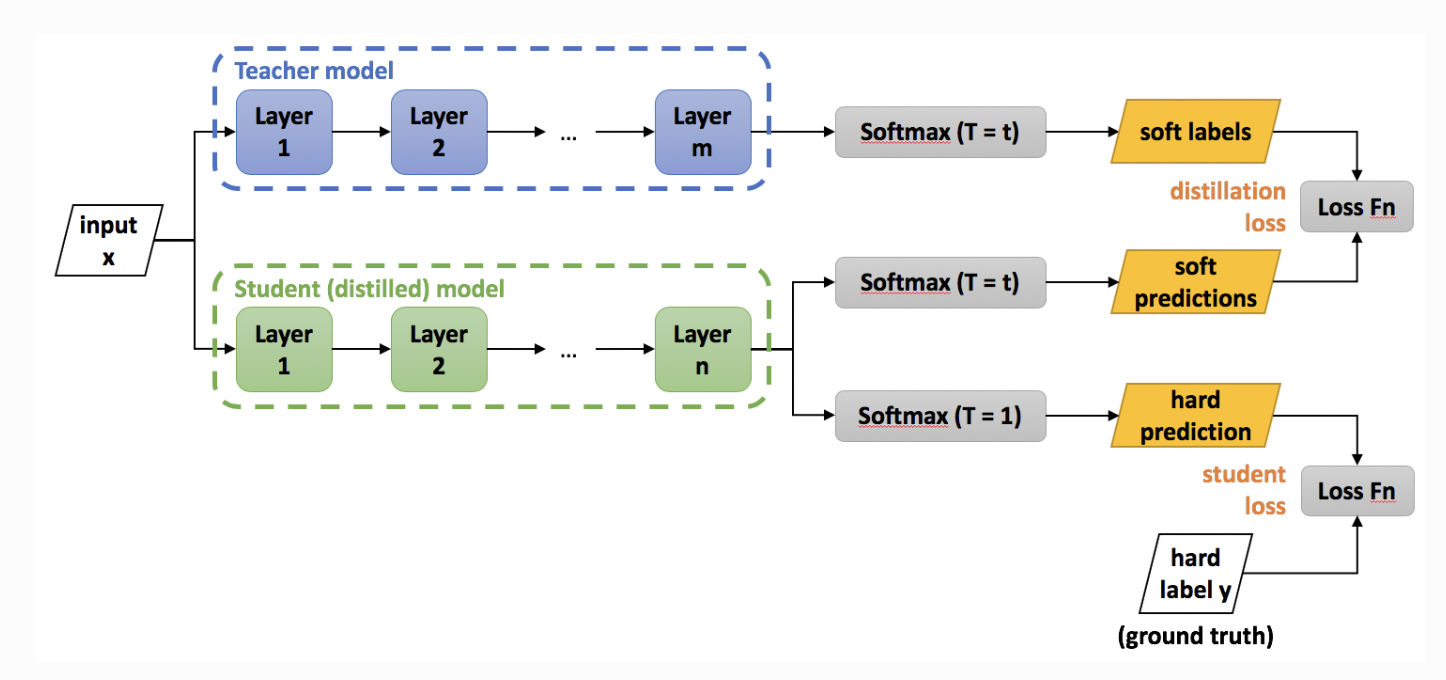

You can read the original DistilBERT paper [here](https://arxiv.org/abs/1910.01108). You can read about knowledge distillation [here](https://arxiv.org/abs/1503.02531).






 A simplified explanation of knowledge distillation is provided [here](https://intellabs.github.io/distiller/knowledge_distillation.html).

